In [0]:
## Load the Drive helper and mount
from google.colab import drive

## This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
## Set the preferred path
%cd drive/My' 'Drive/Google' 'Colab

In [0]:
## Read and display the output classes
f = open ("classes", "r")
out_classes = f.readlines()
f.close()
for i in range(0, len(out_classes)):
  out_classes[i] = out_classes[i].replace('\n', '').replace(' ', '_')
print(out_classes)

In [0]:
## Define a function to fetch the dataset
def obtain_dataset():
  
  import urllib.request
  base_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"
  extensions = [''] * len(out_classes)
  
  for i in range(0, len(out_classes)):
    ## Create URL
    extensions[i] = out_classes[i].replace('_', '%20')
    extensions[i] = extensions[i] + ".npy"
    url = base_url + extensions[i]
    ## Fetch...
    print ("downloading " + url + " ..." )
    urllib.request.urlretrieve(url, "dataset/" + out_classes[i] + ".npy")

In [0]:
## Fetch the dataset
obtain_dataset()

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
%cd dataset
print ("\n")
%ls

In [0]:
def load_dataset():
  ## Initialize variables
  x = np.empty([0, 784])
  y = np.empty([0, 1])
  images_per_class = 18000
  test_set_size = 10000
  
  ## Load the dataset
  for i in range(0, len(out_classes)):
    file = np.load((out_classes[i] + ".npy")) # Load images of a given doodle
    file = file[0 : images_per_class, :]      # Select the first 18000 images
    labels = np.full((file.shape[0], 1), i)
    
    x = np.concatenate((x, file), axis = 0)
    y = np.concatenate((y, labels), axis = 0)
  
  ## Randomise the dataset
  order = np.random.permutation(y.shape[0])
  x = x[order, :]
  y = y[order, :]
  
  ## Split the data
  X_test = x[0 : test_set_size, :]
  Y_test = y[0 : test_set_size, :]
  X_train = x[test_set_size : x.shape[0], :]
  Y_train = y[test_set_size : y.shape[0], :]
  
  return X_train, Y_train, X_test, Y_test

In [0]:
## Load the dataset
X_train, Y_train, X_test, Y_test = load_dataset()

In [0]:
## Perform sanity check
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

ladder


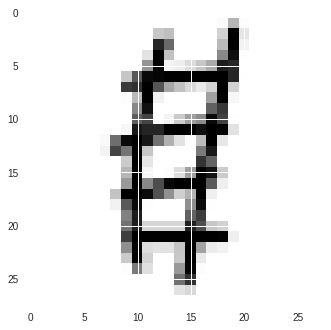

In [73]:
## Print an image
ind = 4500
plt.imshow(X_train[ind].reshape(28,28)) 
print(out_classes[int(Y_train[ind].item())])